In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('COVID-19')

In [4]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [5]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [6]:
data.tail()

,Date,Country,Confirmed,Recovered,Deaths
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7
23687,2020-05-26,Zimbabwe,56,25,4


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [8]:
df=pd.read_csv('COVID-19',parse_dates=['Date'])
print(df)

            Date             Country  Confirmed  Recovered  Deaths
0     2020-01-22         Afghanistan          0          0       0
1     2020-01-22             Albania          0          0       0
2     2020-01-22             Algeria          0          0       0
3     2020-01-22             Andorra          0          0       0
4     2020-01-22              Angola          0          0       0
...          ...                 ...        ...        ...     ...
23683 2020-05-26  West Bank and Gaza        429        365       3
23684 2020-05-26      Western Sahara          9          6       1
23685 2020-05-26               Yemen        249         10      49
23686 2020-05-26              Zambia        920        336       7
23687 2020-05-26            Zimbabwe         56         25       4

[23688 rows x 5 columns]


In [9]:
df.shape

(23688, 5)

In [10]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [11]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [12]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

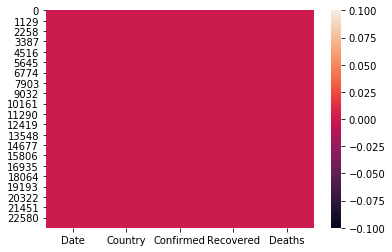

In [13]:
sns.heatmap(df.isnull())

In [14]:
dfcor=df.corr()
dfcor

,Confirmed,Recovered,Deaths
Confirmed,1.000000,0.810991,0.929718
Recovered,0.810991,1.000000,0.778094
Deaths,0.929718,0.778094,1.000000


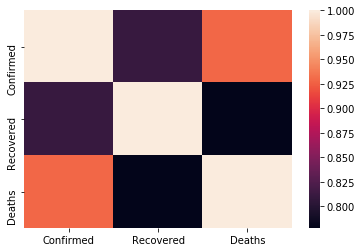

In [15]:
sns.heatmap(dfcor)

In [16]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [17]:
dft=pd.DataFrame(df)

In [18]:
dft

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [19]:
print('Country unqiue:\n')
country=dft.Country.unique()
for coun in country:
    print(coun)

Country unqiue:

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia


In [20]:
dft.Country.value_counts()

United Kingdom    126
Japan             126
Bhutan            126
Rwanda            126
Lesotho           126
                 ... 
Andorra           126
Tunisia           126
Kazakhstan        126
Comoros           126
Pakistan          126
Name: Country, Length: 188, dtype: int64

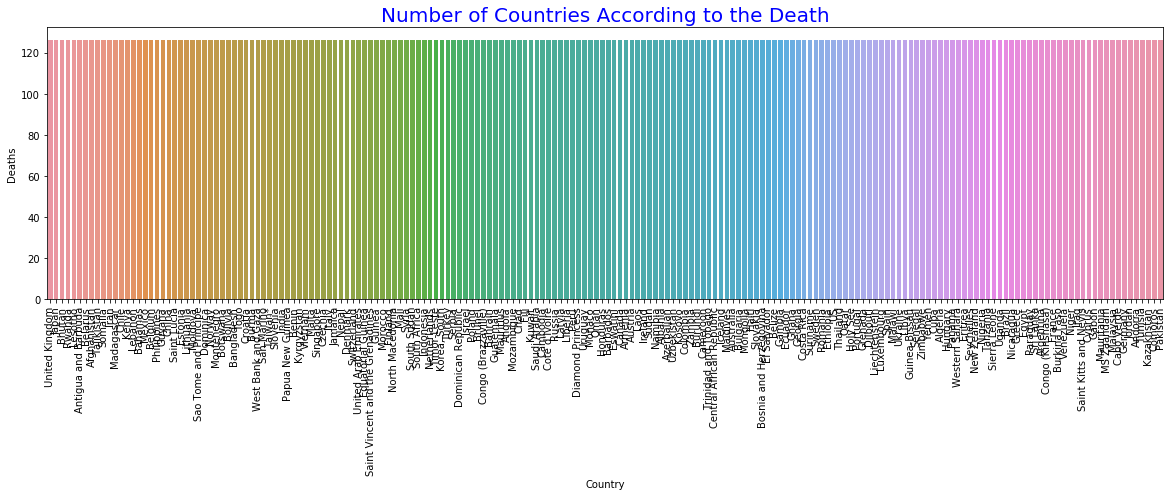

In [21]:
dft = data.Country.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = dft.index, y = dft.values)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Deaths')
plt.title('Number of Countries According to the Death', color = 'blue', fontsize = 20)
plt.show()

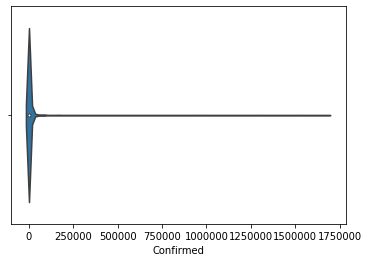

In [22]:
sns.violinplot(x='Confirmed',data=df)
plt.show()

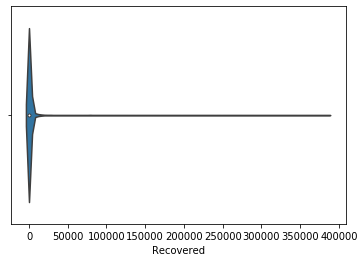

In [23]:
sns.violinplot(x='Recovered',data=df)
plt.show()

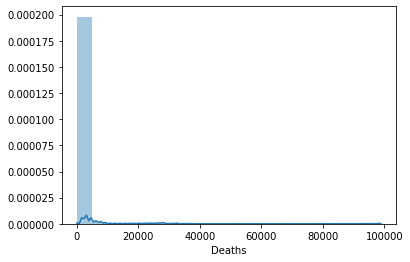

In [24]:
sns.distplot(df['Deaths'],bins=20)
plt.show()

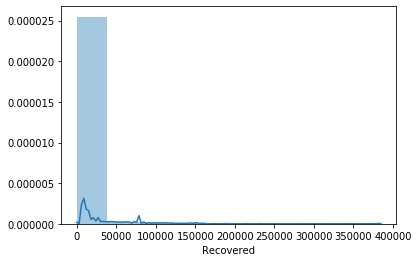

In [25]:
sns.distplot(df['Recovered'],bins=10)
plt.show()

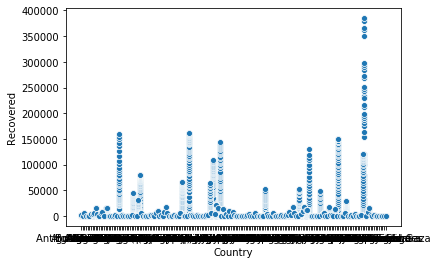

In [26]:
sns.scatterplot(data=df,x='Country',y='Recovered')

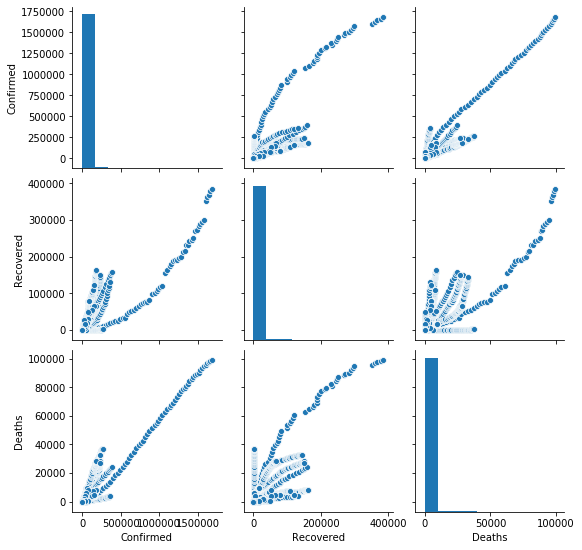

In [27]:
sns.pairplot(df)

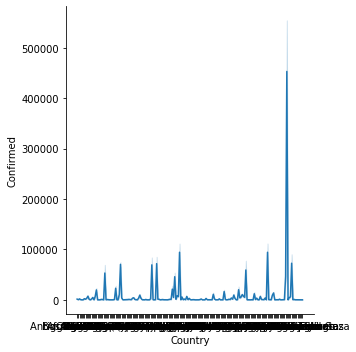

In [28]:
sns.relplot(x='Country',y='Confirmed',kind='line',data=df)

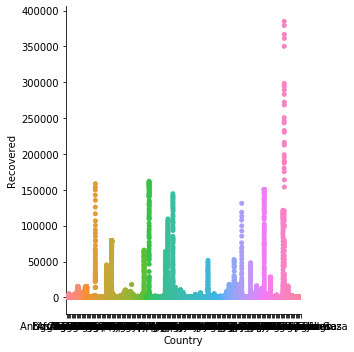

In [29]:
sns.catplot(x='Country',y='Recovered',data=df)

In [30]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])

In [32]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0
...,...,...,...,...,...
23683,2020-05-26,183,429,365,3
23684,2020-05-26,184,9,6,1
23685,2020-05-26,185,249,10,49
23686,2020-05-26,186,920,336,7


In [33]:
df.dtypes

Date         datetime64[ns]
Country               int32
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

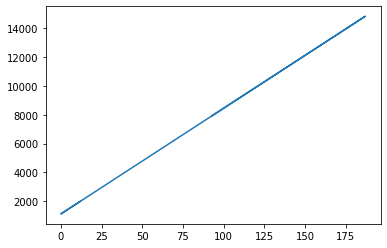

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = df['Country'].values.reshape(-1,1)
y = df['Confirmed'].values.reshape(-1,1)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state=0)

lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)
plt.plot(x_test,y_pred)

In [35]:
x1 = df[['Country', 'Confirmed', 'Recovered']].values
y1 = df['Deaths'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.33, random_state=42)
mlp = LinearRegression()
mlp.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
mlp.coef_

array([[0.19811346, 0.05929507, 0.01892964]])

In [37]:
mlp.intercept_

array([-20.41101382])

In [38]:
mlp.score(x1_train,y1_train)

0.8599208931147733

In [39]:
pred=mlp.predict(x1_test)
print('predicted result price:',pred)
print('actual price',y1_test)

predicted result price: [[-11.6940215 ]
 [ 16.27904345]
 [ 10.0984593 ]
 ...
 [128.52728292]
 [  3.16448814]
 [ -6.63084168]]
actual price [[ 0]
 [ 0]
 [ 0]
 ...
 [64]
 [ 0]
 [ 1]]


In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [41]:
print('error:')
print('mean absolute error:', mean_absolute_error(y1_test,pred))
print('Mean squared error:',mean_squared_error(y1_test,pred))
print('Root Means Squared Error:',np.sqrt(mean_squared_error(y1_test,pred)))

error:
mean absolute error: 265.95201346032064
Mean squared error: 2136269.3058625213
Root Means Squared Error: 1461.5982026064896


In [42]:
from sklearn.metrics import r2_score
print(r2_score(y1_test,pred))

0.876999363402269


In [43]:
from sklearn.linear_model import Lasso,Ridge

In [44]:
ls=Lasso(alpha=0.01)
ls.fit(x1_train,y1_train)
ls.score(x1_train,y1_train)

0.8599208931147709

In [45]:
ls.coef_

array([0.19811006, 0.05929507, 0.01892964])

In [46]:
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x1_train,y1_train)
rd.score(x1_train,y1_train)

0.8599208931147733

In [47]:
rd.coef_

array([[0.19811346, 0.05929507, 0.01892964]])

In [48]:
from sklearn.linear_model import ElasticNet 
enr=ElasticNet(alpha=0.01)
enr=ElasticNet()
enr.fit(x1_train,y1_train)
enrpred=enr.predict(x1_test)
print(enr.score(x1_train,y1_train))
enr.coef_

0.8599208931067497


array([0.19790944, 0.0592951 , 0.01892955])

In [49]:
from sklearn.model_selection import cross_val_score

mlpscore=cross_val_score(mlp,x1,y1,cv=8)
mlpscore
print(mlpscore.mean)

<built-in method mean of numpy.ndarray object at 0x0000008374B4A8F0>


In [50]:
from sklearn.externals import joblib
joblib.dump(enr,'enrfile.obj')

['enrfile.obj']